In [5]:
#Loading datasets:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy.special import expit as sigmoid 

# Set up dataset paths
train_data_path = r'C:\Users\79491\Desktop\train_catvnoncat.h5'
test_data_path = r'C:\Users\79491\Desktop\test_catvnoncat.h5'

# Load the datasets
with h5py.File(train_data_path, 'r') as train_data, h5py.File(test_data_path, 'r') as test_data:
    # Extract training and testing data
    train_X, train_Y = train_data["train_set_x"][:], train_data["train_set_y"][:]
    test_X, test_Y = test_data["test_set_x"][:], test_data["test_set_y"][:]
    classes = test_data["list_classes"][:]

    # Print the dataset's details
    print(train_data.keys())
    print(train_data['train_set_x'])  
    print(train_data['train_set_y'])  
    print(train_data['list_classes'])  
    print(train_X.shape)
    print(train_Y.shape)
    print(classes.shape)
    print(classes) 
    
    # Reshape labels
    train_Y = train_Y.reshape((1, -1))
    test_Y = test_Y.reshape((1, -1))
    print(train_Y.shape)

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
<HDF5 dataset "train_set_y": shape (209,), type "<i8">
<HDF5 dataset "list_classes": shape (2,), type "|S7">
(209, 64, 64, 3)
(209,)
(2,)
[b'non-cat' b'cat']
(1, 209)


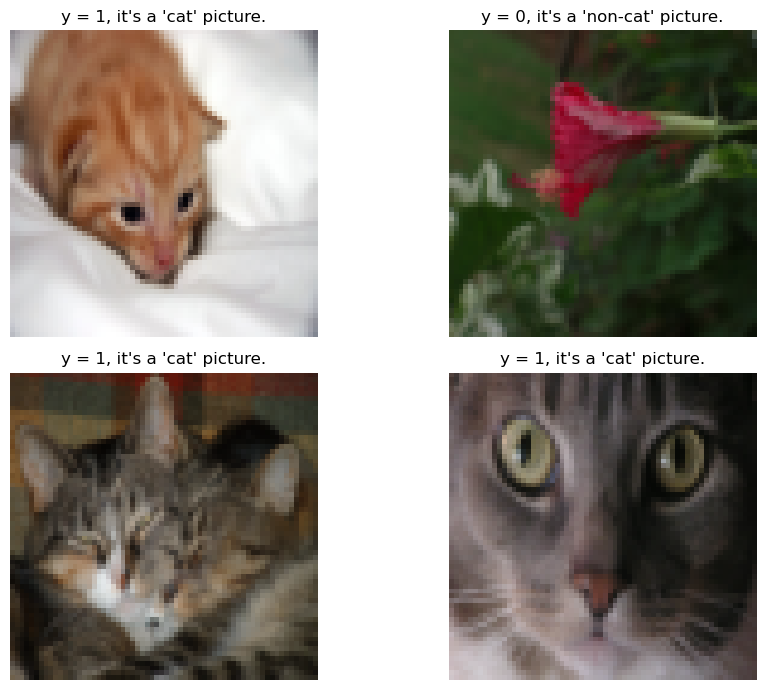

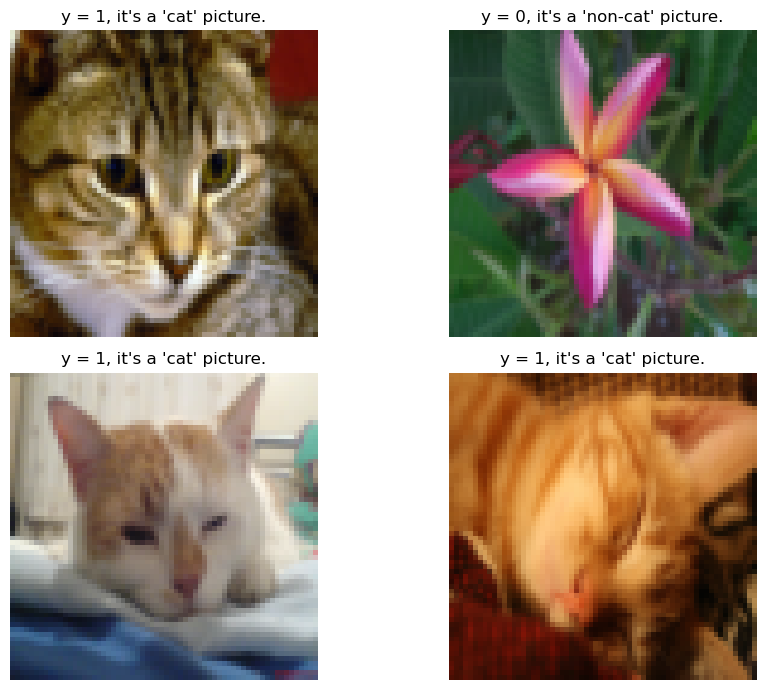

In [4]:
#Visualize some images:
def visualize_images(image_set, label_set, indices_list, classes):
    fig, axes = plt.subplots(2, 2, figsize=(10, 7))
    for idx, ax in zip(indices_list, axes.ravel()):
        ax.imshow(image_set[idx])
        ax.set_title(f"y = {label_set[0, idx]}, it's a '{classes[label_set[0, idx]].decode()}' picture.")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

visualize_images(train_X, train_Y, [57, 58, 59, 60], classes)
visualize_images(test_X, test_Y, [15, 16, 17, 18], classes)

In [7]:
#Flatten and normalize
train_X_flat = (train_X.reshape(train_X.shape[0], -1) / 255).T
test_X_flat = (test_X.reshape(test_X.shape[0], -1) / 255).T
print(train_X_flat.shape)

(12288, 209)


In [9]:
#Define the sigmoid function
def sigmoid(z):
    """
    Compute the sigmoid of z
    """
    return 1 / (1 + np.exp(-z))

#Define the propagate function
def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # Forward propagation
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    
    # Compute cost
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    # Backward propagation
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
  
#Training
dim = train_X_flat.shape[0]
w, b = initialize_parameters(dim)
learning_rate = 0.006
iterations = 10000
record_every = 50

costs = []

for i in range(iterations):
    grads, cost = propagate(w, b, train_X_flat, train_Y)
    
    w -= learning_rate * grads["dw"]
    b -= learning_rate * grads["db"]
    
    if i % record_every == 0:
        costs.append(cost)
        print(f"Cost after iteration {i}: {cost}")
        
# Save weights and biases
scipy.io.savemat("weights.mat", {"weights": w})
scipy.io.savemat("biases.mat", {"biases": b})

Cost after iteration 0: 0.6931471805599453
Cost after iteration 50: 0.7281013187730965
Cost after iteration 100: 0.6498112732446271
Cost after iteration 150: 0.5919060823227436
Cost after iteration 200: 0.5383118237783534
Cost after iteration 250: 0.48758205286415973
Cost after iteration 300: 0.43926169478897487
Cost after iteration 350: 0.39323764869274214
Cost after iteration 400: 0.3498247654306745
Cost after iteration 450: 0.31024837330927274
Cost after iteration 500: 0.2784984357971255
Cost after iteration 550: 0.26060102377338373
Cost after iteration 600: 0.24976400229871917
Cost after iteration 650: 0.24009369325818905
Cost after iteration 700: 0.23117767283922822
Cost after iteration 750: 0.22291552890765365
Cost after iteration 800: 0.21522905139235476
Cost after iteration 850: 0.20805455724093078
Cost after iteration 900: 0.20133887003959522
Cost after iteration 950: 0.19503682036924935
Cost after iteration 1000: 0.18910956153096198
Cost after iteration 1050: 0.18352336452191

Cost after iteration 8800: 0.03040956336491934
Cost after iteration 8850: 0.0302391117161732
Cost after iteration 8900: 0.030070510267915976
Cost after iteration 8950: 0.02990372954359675
Cost after iteration 9000: 0.0297387406830966
Cost after iteration 9050: 0.029575515426798097
Cost after iteration 9100: 0.029414026100143268
Cost after iteration 9150: 0.0292542455986654
Cost after iteration 9200: 0.029096147373475073
Cost after iteration 9250: 0.02893970541718748
Cost after iteration 9300: 0.028784894250272124
Cost after iteration 9350: 0.02863168890781349
Cost after iteration 9400: 0.02848006492666581
Cost after iteration 9450: 0.02832999833298956
Cost after iteration 9500: 0.028181465630156836
Cost after iteration 9550: 0.028034443787011483
Cost after iteration 9600: 0.027888910226473666
Cost after iteration 9650: 0.0277448428144758
Cost after iteration 9700: 0.02760221984921984
Cost after iteration 9750: 0.027461020050743707
Cost after iteration 9800: 0.02732122255078814
Cost aft

In [11]:
# Results:
print(test_X_flat.shape)

# Load weights and biases from saved files
w = scipy.io.loadmat('weights.mat')["weights"]
b = scipy.io.loadmat('biases.mat')["biases"]

print(w.shape)
print(b.shape)

# Predict using the learned weights and biases
A = sigmoid(np.dot(w.T, test_X_flat) + b)
Y_predict_test = (A >= 0.5) * 1.0
Y_predict_train = sigmoid(np.dot(w.T, train_X_flat) + b)

print(f"train accuracy: {(100 - np.mean(np.abs(Y_predict_train - train_Y)) * 100):2f}%")
print(f"test accuracy: {(100 - np.mean(np.abs(Y_predict_test - test_Y)) * 100):2f}%")

(12288, 50)
(12288, 1)
(1, 1)
train accuracy: 97.404120%
test accuracy: 70.000000%


Indices of incorrect predictions: [ 6 10 11 13 18 19 24 28 29 30 34 41 44 45 46]


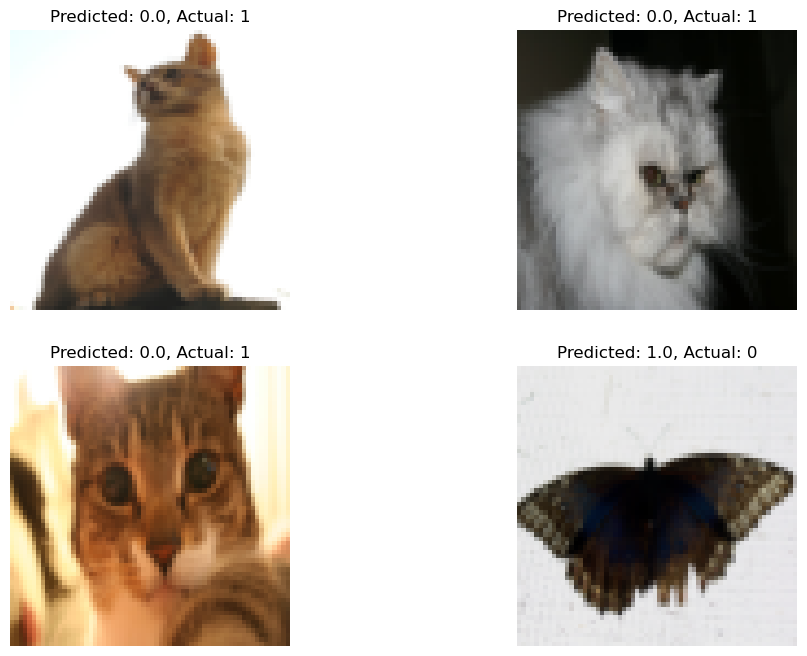

In [12]:
# Identify the incorrect predictions
incorrect_predictions = np.where(Y_predict_test != test_Y)[1]  # Note the use of [1] to get the column indices

# Report the indices
print(f"Indices of incorrect predictions: {incorrect_predictions}")

# Display some of these failed cases
# Create a function
def display_images(indices, dataset):
    plt.figure(figsize=(12, 8))
    for i, index in enumerate(indices):
        plt.subplot(2, 2, i+1)  # Display it in a 2x2 grid
        plt.imshow(dataset[index])
        plt.title(f"Predicted: {Y_predict_test[0, index]}, Actual: {test_Y[0, index]}")
        plt.axis('off')
    plt.show()

# Display first 4 incorrect predictions
display_count = 4
display_images(incorrect_predictions[:display_count], test_X)
